In [1]:
import os

import numpy as np
import xarray as xr
import cfgrib
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from dask.distributed import Client, LocalCluster

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, "axes.labelsize":16, "axes.titlesize":16,
                     "font.weight": "bold","axes.labelweight":"bold","axes.titleweight":"bold",
                    "figure.titleweight":"bold", "figure.titlesize":"large" })

from ambiance import Atmosphere
from aostools import climate

from Eval import plot_map_xr, plot_profile_xr, make_gif
from Eval import var_info, coord_info, results_dir


In [2]:
# Make an atmosphere object
heights = np.linspace(-5e3, 80e3, num=1000)
atmosphere = Atmosphere(heights)

/home/ap1_12/.conda/envs/nwp-py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


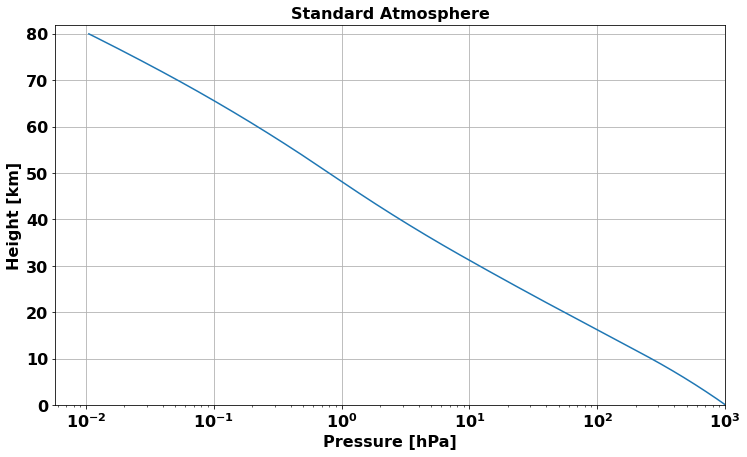

In [3]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(atmosphere.pressure/100, heights/1000)

ax.set_xscale('log')

ax.set_ylim(0,82)
ax.set_xlim(-20,1000)

ax.set_title('Standard Atmosphere')
ax.set_ylabel('Height [km]')
ax.set_xlabel('Pressure [hPa]')
ax.grid()
fig.show()

# Open dataset

In [4]:
dataset = 'icon'

In [5]:
data_dir = '/gemeinsam_tmp/SSW_2021/'

In [6]:
#client = Client(LocalCluster(host='192.168.154.3')) # change to ora's IP adress: 192.168.135.33
client = Client(LocalCluster(host='192.168.155.33'))

In [7]:
client

Client Scheduler: tcp://192.168.155.33:40331 Dashboard: http://192.168.155.33:8787/status,Cluster Workers: 8 Cores: 64 Memory: 810.22 GB


## ICON

In [8]:
filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
infiles = f'{data_dir}dwd/analysis_new/igar??????????'
ds_icon = xr.open_mfdataset(
    infiles,
    engine='cfgrib',
    combine='nested',
    concat_dim = 'time',
    parallel = True,
    backend_kwargs={'filter_by_keys': filter_by_keys},
)

In [9]:
ds_icon

,Array,Chunk
Bytes,9.66 GB,103.82 MB
Shape,"(93, 25, 721, 1440)","(1, 25, 721, 1440)"
Count,372 Tasks,93 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,9.66 GB,103.82 MB
Shape,"(93, 25, 721, 1440)","(1, 25, 721, 1440)"
Count,372 Tasks,93 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


### Chunk the array

### Test Plots

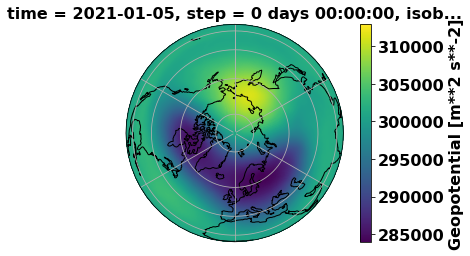

In [10]:
p = ds_icon['z'].sel(
    isobaricInhPa=10,
    time = '2021-01-05T00'
    ).plot(
        subplot_kws=dict(projection=ccrs.Orthographic(0, 90)), 
        transform=ccrs.PlateCarree(),
        #robust = True
)
p.axes.set_global()
p.axes.coastlines()
p.axes.gridlines()

## testtt


In [11]:
var = 'u'
t = ds_icon.time[0]

sel = ds_icon[var].sel(**{coord_info.get(dataset).get('time'): t.data},).load()
sel

<xarray.DataArray 'u' (isobaricInhPa: 25, latitude: 721, longitude: 1440)>
array([[[  0.3550396 ,   0.38238335,   0.41070366, ...,   0.27105522,
           0.29937553,   0.32671928],
        [ -0.24554634,  -0.34417915,  -0.31488228, ...,  -0.33734322,
          -0.30609322,  -0.27581978],
        [ -0.91449165,  -0.8969135 ,  -0.8773823 , ...,  -0.982851  ,
          -0.9603901 ,  -0.9369526 ],
        ...,
        [ -4.518984  ,  -4.5238667 ,  -4.5287495 , ...,  -4.503359  ,
          -4.509218  ,  -4.514101  ],
        [ -4.496523  ,  -4.5023823 ,  -4.507265  , ...,  -4.478945  ,
          -4.484804  ,  -4.4906635 ],
        [ -5.009218  ,  -5.014101  ,  -5.0199604 , ...,  -4.99164   ,
          -4.9974995 ,  -5.003359  ]],

       [[  0.3558426 ,   0.38318634,   0.4105301 , ...,   0.27185822,
           0.29920197,   0.32654572],
        [ -0.24571991,  -0.34337616,  -0.31407928, ...,  -0.33751678,
          -0.30626678,  -0.2769699 ],
        [ -0.91368866,  -0.89806366,  -0.8765793 , ...,  -0.98204803,
          -0.96056366,  -0.93712616],
...
        [-70.68656   , -70.70219   , -70.713905  , ..., -70.631874  ,
         -70.651405  , -70.67094   ],
        [-71.838905  , -71.85453   , -71.870155  , ..., -71.78422   ,
         -71.80375   , -71.82328   ],
        [-74.631874  , -74.65531   , -74.67875   , ..., -74.54594   ,
         -74.57719   , -74.60453   ]],

       [[ -6.5872116 ,  -6.6028366 ,  -6.6184616 , ...,  -6.532524  ,
          -6.548149  ,  -6.5715866 ],
        [ -6.6965866 ,  -6.720024  ,  -6.735649  , ...,  -6.641899  ,
          -6.657524  ,  -6.6809616 ],
        [ -7.016899  ,  -7.032524  ,  -7.0559616 , ...,  -6.954399  ,
          -6.9778366 ,  -6.9934616 ],
        ...,
        [-80.33721   , -80.38409   , -80.42315   , ..., -80.2044    ,
         -80.251274  , -80.29815   ],
        [-82.64971   , -82.688774  , -82.72784   , ..., -82.5169    ,
         -82.563774  , -82.60284   ],
        [-86.07159   , -86.11846   , -86.157524  , ..., -85.92315   ,
         -85.97784   , -86.02471   ]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 2020-12-15
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 950 925 900 850 800 ... 7 5 3 2 1
  * latitude       (latitude) float64 -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 2020-12-15
Attributes: (12/29)
    GRIB_paramId:                             131
    GRIB_shortName:                           u
    GRIB_units:                               m s**-1
    GRIB_name:                                U component of wind
    GRIB_cfName:                              eastward_wind
    GRIB_cfVarName:                           u
    ...                                       ...
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   -90.0
    GRIB_latitudeOfLastGridPointInDegrees:    90.0
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

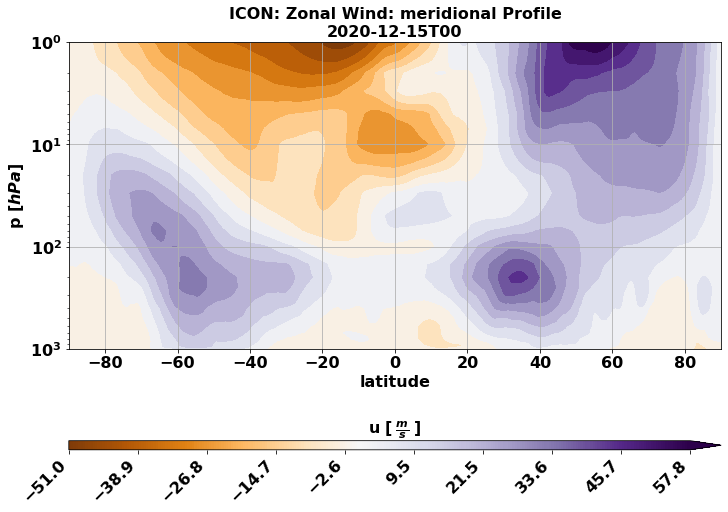

In [12]:
plot_profile_xr(sel, t, dataset=dataset,  mode='meridional',
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=20,
                save=False )

### Plot u meridional profiles: ~2 min

In [13]:
var = 'u'

In [14]:
sel_all = ds_icon[var].sel(
#               **{coord_info.get(dataset).get('lat'): slice(0, 10)},
#               **{coord_info.get(dataset).get('p'): slice(500, 1)}
).load()

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(**{coord_info.get(dataset).get('time'): t.data},) 
  
    plot_profile_xr(sel, t, dataset=dataset,  mode='meridional',
                    norm_bound=(mini, maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=20,
                    save=True )

In [16]:
file_folder = results_dir.get(dataset) + '/u_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Plot t meridional profiles: ~2 min

In [ ]:
var = 't'

In [ ]:
sel_all = ds_icon[var].sel(
#               **{coord_info.get(dataset).get('lat'): slice(0, 10)},
#               **{coord_info.get(dataset).get('p'): slice(500, 1)}
).load()

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(**{coord_info.get(dataset).get('time'): t.data},)
    
    plot_profile_xr(sel, t, dataset=dataset, mode='meridional',
                    norm_bound=(mini, maxi), norm_type = 'linear', 
                    cmap = plt.cm.Reds, levels=20, 
                    save=True, )

In [ ]:
file_folder = results_dir.get(dataset) + '/t_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Plot t (°C) meridional profiles: ~2 min

In [ ]:
var = 't'

In [ ]:
sel_all = ds_icon[var].sel(
#               **{coord_info.get(dataset).get('lat'): slice(0, 10)},
#               **{coord_info.get(dataset).get('p'): slice(500, 1)}
).load() - 273.15
sel_all = sel_all.rename('tc')

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(**{coord_info.get(dataset).get('time'): t.data},)
    
    plot_profile_xr(sel, t, dataset=dataset, mode='meridional',
                    norm_bound=(mini, maxi), norm_type = 'diverging', 
                    cmap = plt.cm.RdBu_r, levels=20, 
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/tc_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Plot Geopotential maps: ~10 min

In [ ]:
p_level = 10
var = 'z'

In [ ]:
sel_all = ds_icon[var].sel(
                **{coord_info.get(dataset).get('lat'): slice(0, 90)},
                **{coord_info.get(dataset).get('p'): p_level},
                ).compute()
maxi = sel_all.max().data
mini = sel_all.min().data

In [ ]:
for t in sel_all.time:
    icon_plot = sel_all.sel(**{coord_info.get(dataset).get('time'): t.data})
    plot_map_xr(icon_plot, t, dataset=dataset, figsize=(6,6),
             projection=ccrs.Orthographic(central_longitude=0, central_latitude=90),
             norm=True, norm_bound=(mini, maxi), norm_type='linear',
             levels=20, cmap=plt.cm.Purples,
             save=True
             )

In [ ]:
file_folder = results_dir.get(dataset) + 'z_' + str(int(p_level)) + 'hPa'
make_gif(file_folder, dataset=dataset, duration=150)

### Plot Temperature (°C) maps: ~10 min

In [ ]:
p_level = 10
var = 't'

In [ ]:
sel_all = ds_icon[var].sel(
                **{coord_info.get(dataset).get('lat'): slice(0, 90)},
                **{coord_info.get(dataset).get('p'): p_level},
                ).load() - 273.15

sel_all = sel_all.rename('tc')

maxi = sel_all.max().data
mini = sel_all.min().data

In [ ]:
for t in sel_all.time:
    icon_plot = sel_all.sel(**{coord_info.get(dataset).get('time'): t.data})
    plot_map_xr(icon_plot, t, dataset=dataset, figsize=(6,6),
             projection=ccrs.Orthographic(central_longitude=0, central_latitude=90),
             norm=True, norm_bound=(mini,0, maxi), norm_type='diverging',
             levels=20, cmap=plt.cm.RdBu_r,
             save=True
             )

In [ ]:
file_folder = results_dir.get(dataset) + '/tc_' + str(int(p_level)) + 'hPa'
make_gif(file_folder, dataset=dataset, duration=150)

### Plot Geopotential profiles: ~10 min

# EP Flux tests

In [ ]:
t = ds_icon.time[0:5]

In [ ]:
test_data = ds_icon.sel(
    #isobaricInhPa=10,
    time = t.data
    ).load()

In [ ]:
test_data.dims

In [ ]:
ep1, ep2, ep1_div, ep2_div = climate.ComputeEPfluxDivXr(test_data['u'],test_data['v'], test_data['t'],
                lat=coord_info.get(dataset).get('lat'), lon=coord_info.get(dataset).get('lon'),
                pres=coord_info.get(dataset).get('p'), time=coord_info.get(dataset).get('time') )

ep1.name = 'EP1'
ep2.name = 'EP2'
ep1_div.name = 'EP1_div'
ep2_div.name = 'EP2_div'

In [ ]:
ep1.dims, ep1.shape

In [ ]:
t = ep1.time[0]

sel = ep1.sel(time = t.data,
#                    **{coord_info.get(dataset).get('lat'): slice(0, 10)},
                   **{coord_info.get(dataset).get('p'): slice(500, 1)}) 

#norm_bound=(-0.5, 0.5)

# meridional    zonal
plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=50,
                save=False )

In [ ]:
t = ep1.time[0]

sel = ep2.sel(time = t.data,
#                    **{coord_info.get(dataset).get('lat'): slice(0, 10)},
                   **{coord_info.get(dataset).get('p'): slice(500, 1)}
                  ) 

#norm_bound=(-0.5, 0.5)

# meridional    zonal
plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=50,
                save=False )

In [ ]:
t = ep1.time[0]

sel = ep1_div.sel(time = t.data,
                       **{coord_info.get(dataset).get('lat'): slice(-89, 89)},
                       **{coord_info.get(dataset).get('p'): slice(500, 1)},
                      ) 

norm_bound=(-1e+2,1e+2)

# meridional    zonal
plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=50,
                save=False )

In [ ]:
t = ep1.time[0]

sel = ep2_div.sel(time = t.data)
sel = sel.sel(**{coord_info.get(dataset).get('lat'): slice(-89, 89)},
                      **{coord_info.get(dataset).get('p'): slice(
                                                      #sel[coord_info.get(dataset).get('p')][4].data,
                                                      500,
                                                      sel[coord_info.get(dataset).get('p')][-1].data)},
                         ) 
, 
                       

# meridional    zonal
plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=50,
                save=False )

In [ ]:
ep2.sel(**{coord_info.get(dataset).get('p'): 10},
        **{coord_info.get(dataset).get('lat'): 50}
       ).plot()

In [ ]:
ds_icon[coord_info.get(dataset).get('p')]

### Compote EP Eddy Heat

In [ ]:
test_data = ds_icon.sel(
    **{coord_info.get(dataset).get('p'): slice(20, 5)},
    **{coord_info.get(dataset).get('lat'): slice(45, 75)}
       ).load()

In [ ]:
ep1, ep2, ep1_div, ep2_div = climate.ComputeEPfluxDivXr(test_data['u'], test_data['v'], test_data['t'],
                lat=coord_info.get(dataset).get('lat'), lon=coord_info.get(dataset).get('lon'),
                pres=coord_info.get(dataset).get('p'), time=coord_info.get(dataset).get('time') )

ep1.name = 'EP1'
ep2.name = 'EP2'
ep1_div.name = 'EP1_div'
ep2_div.name = 'EP2_div'

In [ ]:
ep2.sel(**{coord_info.get(dataset).get('p'): 10},
        **{coord_info.get(dataset).get('lat'): 50}
       ).plot()

## Compute whole timeseries EP (loading data ~5:30 min | EP calc ~2:30 min)

In [ ]:
test_data = ds_icon.load()

In [ ]:
ep1, ep2, ep1_div, ep2_div = climate.ComputeEPfluxDivXr(test_data['u'], test_data['v'], test_data['t'],
                lat=coord_info.get(dataset).get('lat'), lon=coord_info.get(dataset).get('lon'),
                pres=coord_info.get(dataset).get('p'), time=coord_info.get(dataset).get('time') )

ep1.name = 'EP1'
ep2.name = 'EP2'
ep1_div.name = 'EP1_div'
ep2_div.name = 'EP2_div'

In [ ]:
ep2.sel(**{coord_info.get(dataset).get('p'): 10},
        **{coord_info.get(dataset).get('lat'): 50}
       ).plot()

### Compute EP1 profile series ~ 1 min

In [ ]:
sel_all = ep1.sel(
#               **{coord_info.get(dataset).get('lat'): slice(0, 10)},
              **{coord_info.get(dataset).get('p'): slice(500, 1)})

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(time = t.data) 
    
    plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                    norm_bound=(mini,maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=50,
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/EP1_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Compute EP2 profile series ~ 1 min

In [ ]:
sel_all = ep2.sel(
#               **{coord_info.get(dataset).get('lat'): slice(0, 10)},
              **{coord_info.get(dataset).get('p'): slice(500, 1)})

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(time = t.data) 

    plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                    norm_bound=(mini,maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=50,
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/EP2_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Compute EP1_div profile series ~ 1 min

In [ ]:
sel_all = ep1_div.sel(
              **{coord_info.get(dataset).get('lat'): slice(-89, 89)},
              **{coord_info.get(dataset).get('p'): slice(500, 1)})

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(time = t.data) 

    plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                    norm_bound=(mini,maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=50,
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/EP1_div_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

### Compute EP2_div profile series ~ 1 min

In [ ]:
sel_all = ep2_div.sel(
              **{coord_info.get(dataset).get('lat'): slice(-89, 89)},
              **{coord_info.get(dataset).get('p'): slice(500, 1)})

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(time = t.data) 

    plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                    norm_bound=(mini,maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=50,
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/EP2_div_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)

# VMFC
vmfc_20201215_20210107.nc

In [ ]:
filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
infiles = f'{data_dir}dwd/analysis_new/vmfc_20201215_20210107.nc'
ds_icon_vmfc = xr.open_mfdataset(
    infiles,
    #engine='cfgrib',
    #combine='nested',
    #concat_dim = 'time',
    parallel = True,
    #backend_kwargs={'filter_by_keys': filter_by_keys},
).load()


In [ ]:
ds_icon_vmfc.time

In [ ]:
t = ds_icon_vmfc.time[0]

sel = ds_icon_vmfc['vmfc'].sel(time = t.data)
sel = sel.sel(
            #**{coord_info.get(dataset).get('lat'): slice(-89, 89)},
            **{coord_info.get(dataset).get('p'): slice(500,1)},
             )

In [ ]:
# meridional    zonal
plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                norm_bound=None, norm_type = 'diverging', 
                cmap = plt.cm.PuOr, levels=50,
                save=False )

### Compute VMFC profile series ~ 1 min

In [ ]:
sel_all = ds_icon_vmfc['vmfc'].sel(
              #**{coord_info.get(dataset).get('lat'): slice(-89, 89)},
              **{coord_info.get(dataset).get('p'): slice(500, 1)})

mini = sel_all.min().data
maxi = sel_all.max().data

for t in sel_all.time:
    sel = sel_all.sel(time = t.data) 

    plot_profile_xr(sel, t, dataset=dataset, mode='meridional', average = False,
                    norm_bound=(mini,maxi), norm_type = 'diverging', 
                    cmap = plt.cm.PuOr, levels=50,
                    save=True )

In [ ]:
file_folder = results_dir.get(dataset) + '/vmfc_meridional_profile'
make_gif(file_folder, dataset=dataset, duration=150)